In [1]:
# %matplotlib inline

In [2]:
path = '../latex/plots/CA_deaths_JHU/'

In [3]:
import notebooks.src.visualizingrestatements.visualizingrestatements as vs

In [4]:
import datetime as dt
import numpy as np
import pandas as pd
import boto3
import time
import sys
import os
from contextlib import contextmanager
from io import StringIO
from collections import defaultdict
from botocore.config import Config
from stations.station import df_from_s3_csv, df_to_s3_csv
import matplotlib.pyplot as plt
import matplotlib.ticker as mtk
from matplotlib.patches import Rectangle
import matplotlib.dates as mdates
from math import ceil

In [5]:
ACCESS_KEY_ID = # add yours here
SECRET_ACCESS_KEY = # add yours here
creds_dict = {
    'aws_access_key_id': ACCESS_KEY_ID,
    'aws_secret_access_key': SECRET_ACCESS_KEY,
    'region_name': "us-west-2",
    'config': Config(s3={"use_accelerate_endpoint": True})
}


In [6]:
state = "California"
col = "deaths"
data_title = f'CA {col.title()}'
df = df_from_s3_csv(bucket='us-formatted-data', key=f'JHU/US/{state}//{col}/data.csv', **creds_dict)
df.index = pd.to_datetime(df.index, format="%Y-%m-%d")
df.columns = pd.to_datetime(df.columns, format="%Y-%m-%d")

Attempting to read S3 object JHU/US/California//deaths/data.csv in us-formatted-data
Successfully read S3 object JHU/US/California//deaths/data.csv in us-formatted-data


In [7]:
rdict = vs.major_restatements(df, 0)

In [8]:
spring2020_df = df.loc["2020-03-01":"2020-04-30","2020-03-01":"2020-04-30"]
spring2020_title = "March-April 2020 CA Deaths"

In [9]:
summer2021_df = df.loc["2021-05-01":"2021-06-30","2021-05-01":"2021-06-30"]
summer2021_title = "May-June 2021 CA Deaths"
isummer2021_df = df.loc["2021-07-01":"2021-08-30","2021-07-01":"2021-08-30"]
isummer2021_title = "July-Aug 2021 CA Deaths"
fall2021_df = df.loc["2021-10-01":"2021-11-30","2021-10-01":"2021-11-30"]
fall2021_title = "Oct-Nov 2021 CA Deaths"
summer2022_df = df.loc["2022-04-01":"2022-05-30","2022-04-01":"2022-05-30"]
summer2022_title = "April-May 2022 CA Deaths"

# Stacked Line

## No Stacking

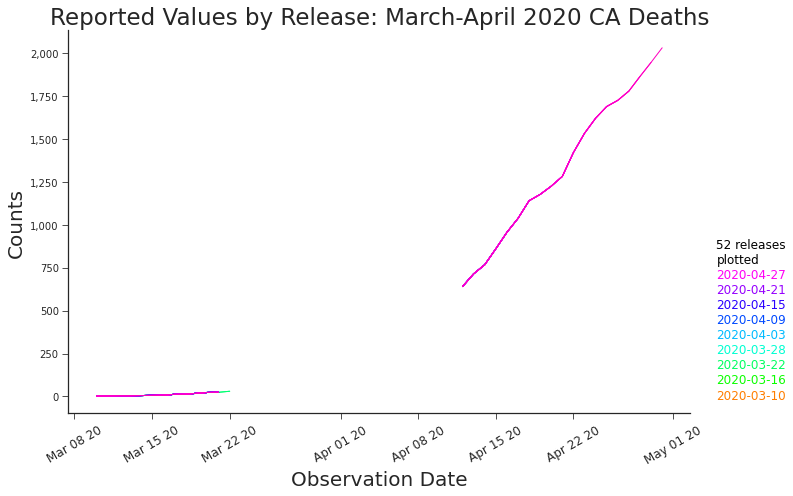

In [10]:
fig, ax, dct = vs.plot_multiple_releases(spring2020_df,data_title=spring2020_title, shift=0, alpha=1.0, show=True)

In [11]:
fig.savefig(f'{path}spring2020_line.png',  bbox_inches = "tight")

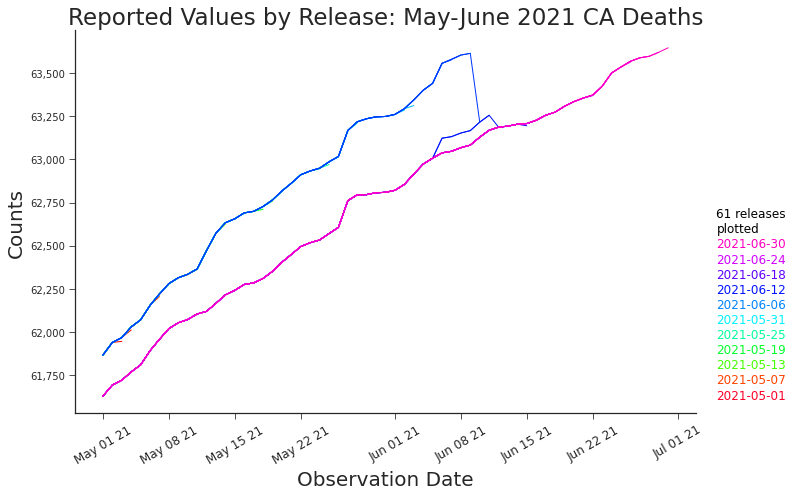

In [12]:
fig, ax, dct = vs.plot_multiple_releases(summer2021_df,data_title=summer2021_title, shift=0, alpha=1, show=True)

In [13]:
fig.savefig(f'{path}summer2021_line.png', bbox_inches = "tight")

## Stacked

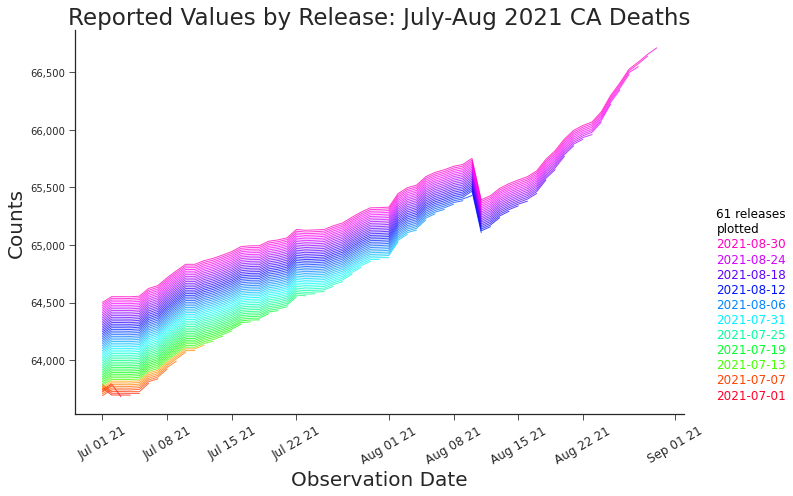

In [14]:
fig, ax, dct = vs.plot_multiple_releases(isummer2021_df,data_title=isummer2021_title, shift=15, alpha=.75, show=True)

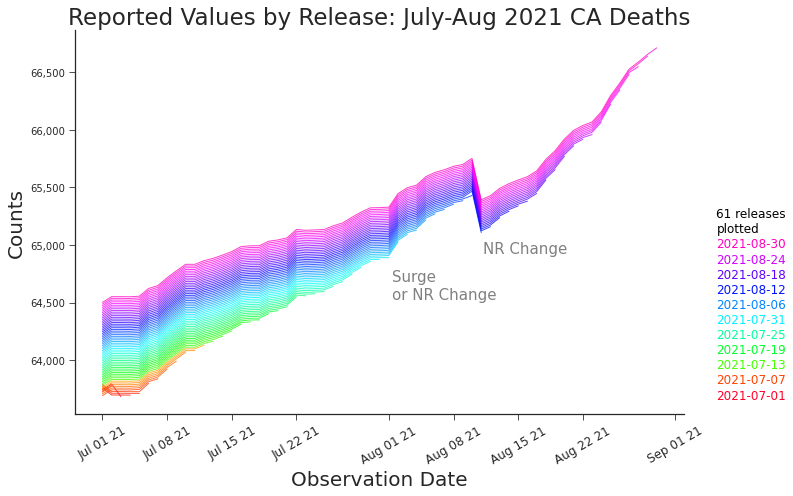

In [15]:
ax.text(.67 , .42, f'NR Change', color='grey', fontsize=15, transform=ax.transAxes)
ax.text(.52 , .3, f'Surge\nor NR Change', color='grey', fontsize=15, transform=ax.transAxes)
fig

In [16]:
fig.savefig(f'{path}isummer2021_stacked_line.png', bbox_inches = "tight")

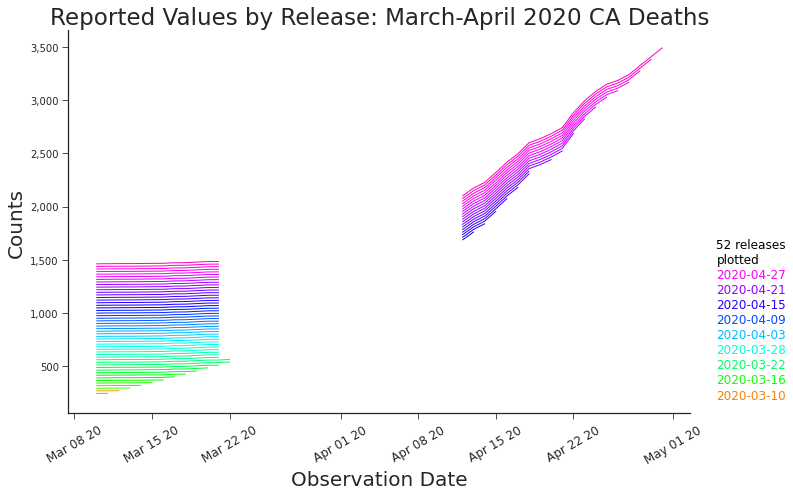

In [17]:
fig, ax, dct = vs.plot_multiple_releases(spring2020_df,data_title=spring2020_title, show=True, alpha=1)

In [18]:
x = spring2020_df.columns[25]
y = 1300
ax.text(x , y, f'Missing Data', color='grey', fontsize=20) #, transform=ax.transAxes)

Text(2020-03-26 00:00:00, 1300, 'Missing Data')

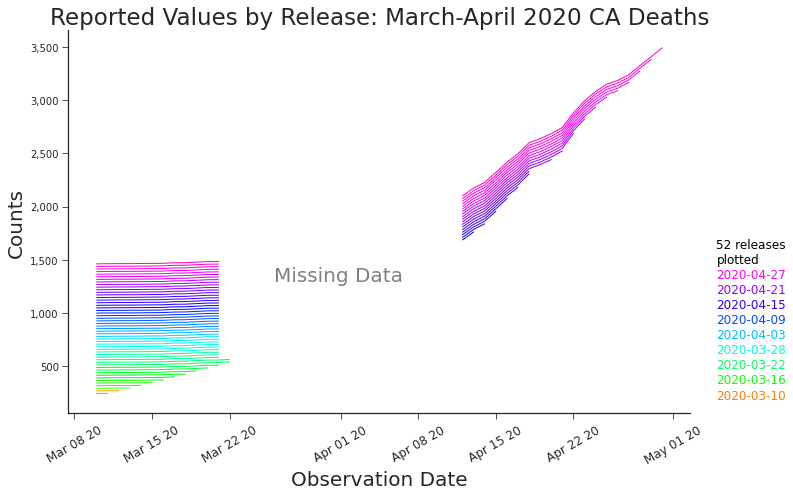

In [19]:
fig

In [20]:
fig.savefig(f'{path}spring2020_stacked_line.png', bbox_inches = "tight")

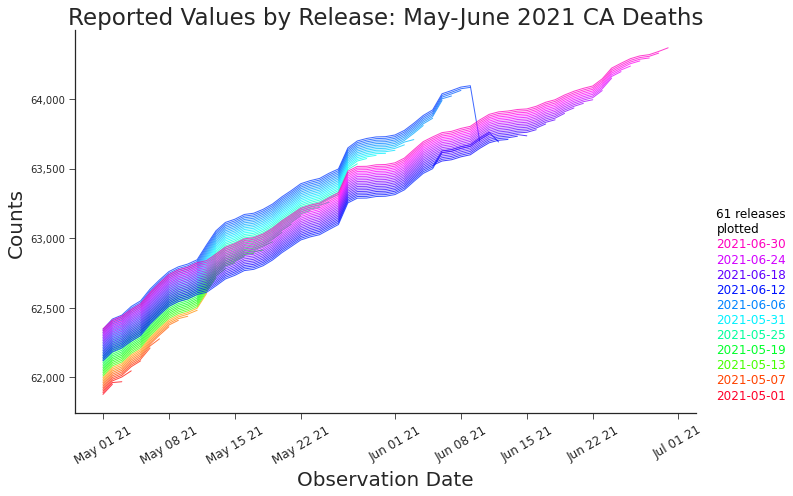

In [21]:
fig, ax, dct = vs.plot_multiple_releases(summer2021_df,data_title=summer2021_title, shift=12, alpha=.75, show=True)

In [22]:
fig.savefig(f'{path}summer2021_stacked_line.png', bbox_inches = "tight")

# Matrix

## Heatmap

In [23]:
# fig, __, __ = vs.plot_staircase(df ,data_title=data_title, show=True, heatmap=True)
# fig.savefig(f'{path}all_heatmap.png', bbox_inches = "tight")

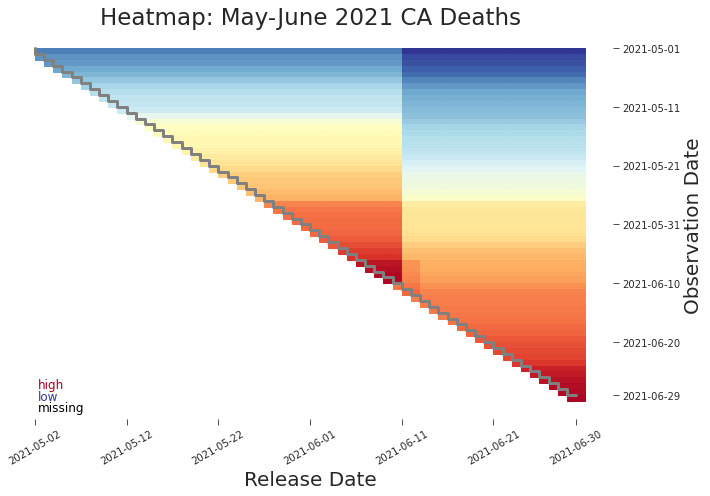

In [24]:
fig, ax, dct = vs.plot_staircase(summer2021_df ,data_title=summer2021_title, show=True, heatmap=True)

In [25]:
summer2021_df 

,2021-05-01,2021-05-02,2021-05-03,2021-05-04,2021-05-05,2021-05-06,2021-05-07,2021-05-08,2021-05-09,2021-05-10,...,2021-06-21,2021-06-22,2021-06-23,2021-06-24,2021-06-25,2021-06-26,2021-06-27,2021-06-28,2021-06-29,2021-06-30
2021-05-01,61866.0,61866.0,61866.0,61866.0,61866.0,61866.0,61866.0,61866.0,61866.0,61866.0,...,61628.0,61628.0,61628.0,61628.0,61628.0,61628.0,61628.0,61628.0,61628.0,61628.0
2021-05-02,NaN,61939.0,61939.0,61939.0,61939.0,61939.0,61939.0,61939.0,61939.0,61939.0,...,61692.0,61692.0,61692.0,61692.0,61692.0,61692.0,61692.0,61692.0,61692.0,61692.0
2021-05-03,NaN,NaN,61945.0,61967.0,61967.0,61967.0,61967.0,61967.0,61967.0,61967.0,...,61720.0,61720.0,61720.0,61720.0,61720.0,61720.0,61720.0,61720.0,61720.0,61720.0
2021-05-04,NaN,NaN,NaN,62011.0,62029.0,62029.0,62029.0,62029.0,62029.0,62029.0,...,61768.0,61768.0,61768.0,61768.0,61768.0,61768.0,61768.0,61768.0,61768.0,61768.0
2021-05-05,NaN,NaN,NaN,NaN,62071.0,62070.0,62070.0,62070.0,62070.0,62070.0,...,61809.0,61809.0,61809.0,61809.0,61809.0,61809.0,61809.0,61809.0,61809.0,61809.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,63564.0,63569.0,63569.0,63569.0,63569.0
2021-06-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,63589.0,63589.0,63589.0,63589.0
2021-06-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63598.0,63598.0,63598.0
2021-06-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63621.0,63621.0


In [ ]:
fig.savefig(f'{path}summer2021_heatmap.png', bbox_inches = "tight")

## Between Releases

In [ ]:
fig, ax, dct = vs.plot_between_release_changes(df ,data_title="CA Deaths", missing=False, show=True)
fig.savefig(f'{path}between_release.png', bbox_inches = "tight")

In [ ]:
fig, ax, dct = vs.plot_between_release_changes(summer2021_df ,data_title=summer2021_title, show=True)

In [ ]:
ax.text(.35 , .75, f'Prior to\nRetroactive\nChange', color='grey', fontsize=20, transform=ax.transAxes)
ax.text(.75 , .75, f'After\nRetroactive\nChange', color='grey', fontsize=20, transform=ax.transAxes)

In [ ]:
fig

In [ ]:
fig.savefig(f'{path}summer2021_between_release_annotated.png', bbox_inches = "tight")

## Within Releases

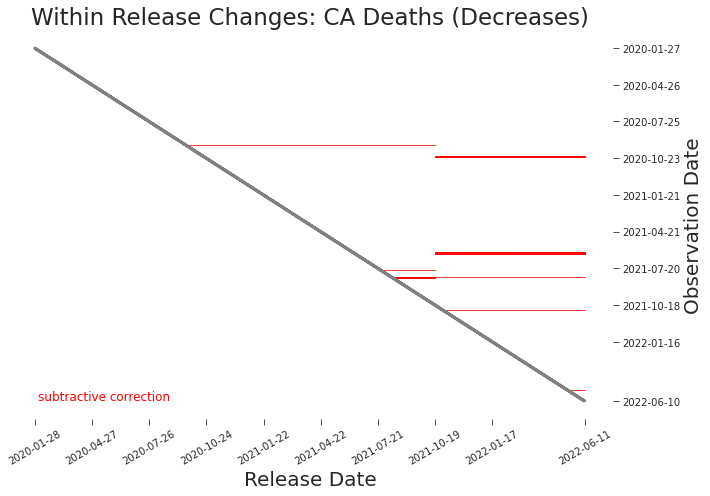

In [31]:
fig, ax, dct = vs.plot_within_release_changes(
    df ,data_title=data_title + " (Decreases)",
    missing=False, show=True,
    alpha = 1, window=1, func=lambda x: 0, positive=False, percent=False)

In [32]:
fig.savefig(f'{path}within_release_negative.png', bbox_inches = "tight")

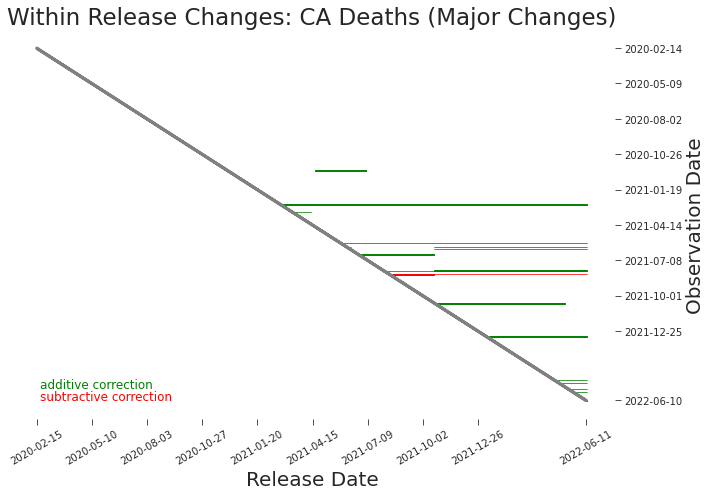

In [33]:
within_release_changes_dct = {"alpha": 2, "window": 14, "func": "avg"}
fig, ax, dct = vs.plot_within_release_changes(
    df, data_title=data_title + " (Major Changes)",
    missing=False, show=True,
    **within_release_changes_dct)
fig.savefig(f'{path}within_release.png', bbox_inches = "tight")

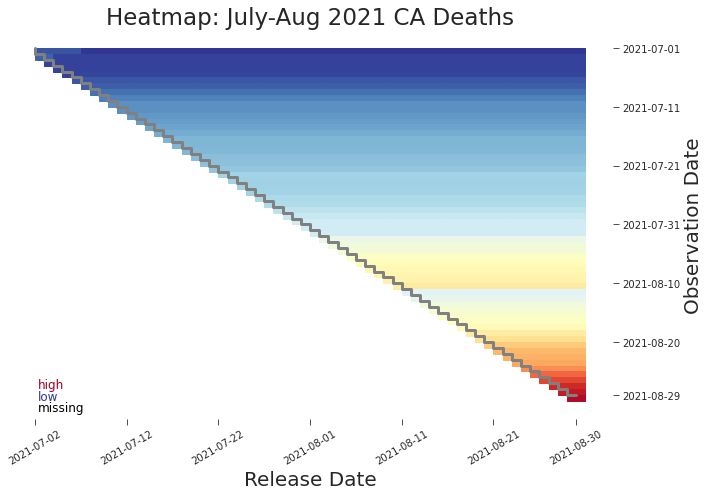

In [34]:
fig, ax, dct = vs.plot_staircase(isummer2021_df ,data_title=isummer2021_title, show=True, heatmap=True)

In [35]:
ax.text(.345 , .305, f'Suspected Decrease->', color='grey', fontsize=15, transform=ax.transAxes)

Text(0.345, 0.305, 'Suspected Decrease->')

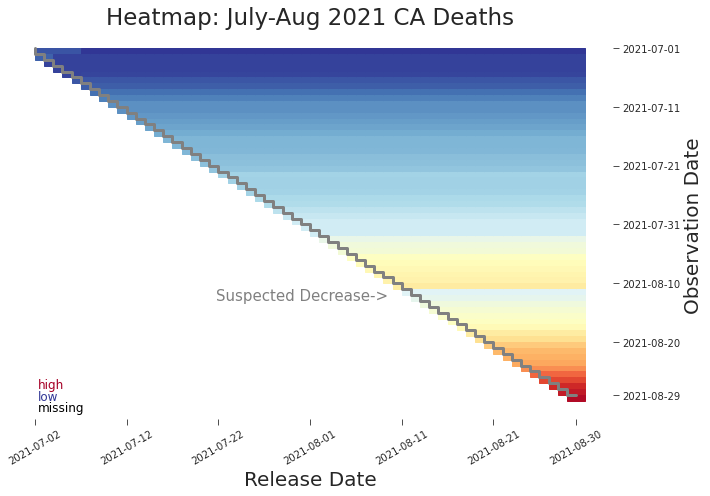

In [36]:
fig

In [37]:
fig.savefig(f'{path}isummer2021_heatmap_annotated.png', bbox_inches = "tight")

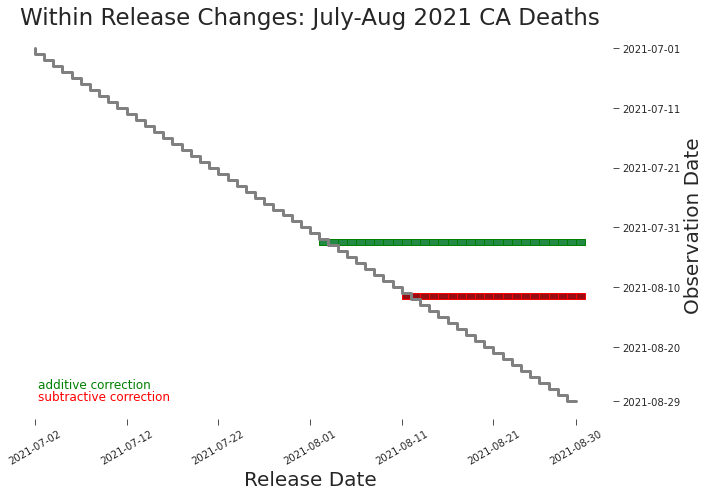

In [38]:
fig, ax, dct = vs.plot_within_release_changes(
    isummer2021_df ,data_title=isummer2021_title,
    show=True,
    **within_release_changes_dct)

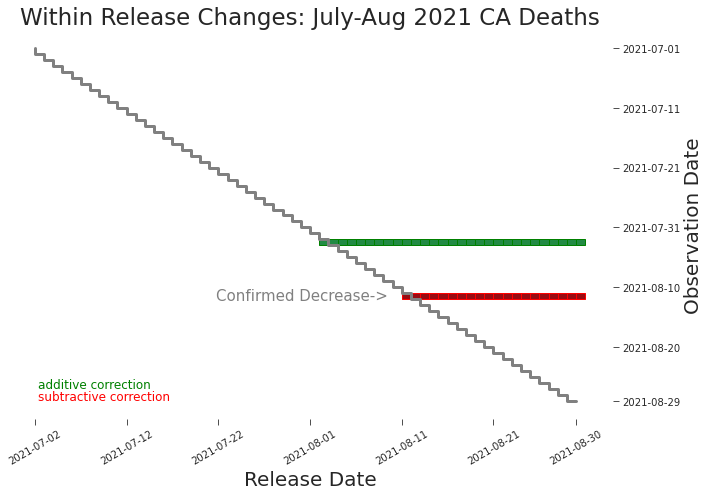

In [39]:
ax.text(.345 , .305, f'Confirmed Decrease->', color='grey', fontsize=15, transform=ax.transAxes)
fig

In [40]:
fig.savefig(f'{path}isummer2021_within_release.png', bbox_inches = "tight")

In [41]:
ax.text(.6 , .465, f'Surge or NR Change', color='grey', fontsize=20, transform=ax.transAxes)
ax.text(.7 , .34, f'NR Change', color='grey', fontsize=20, transform=ax.transAxes)

Text(0.7, 0.34, 'NR Change')

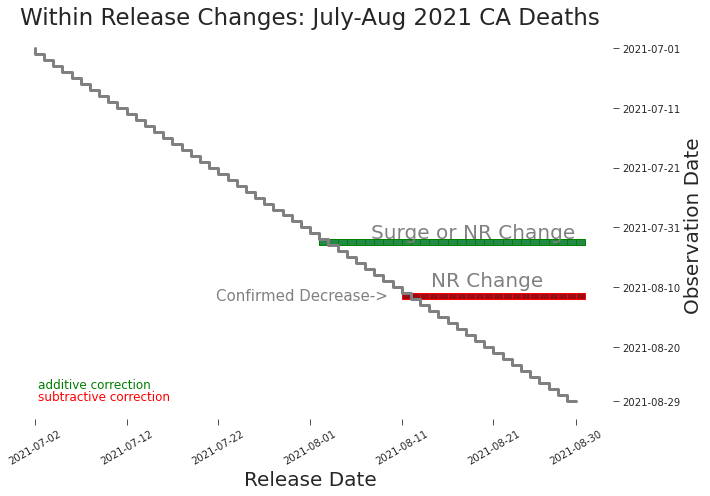

In [42]:
fig

In [43]:
fig.savefig(f'{path}isummer2021_within_release_annotated.png', bbox_inches = "tight")

# Restatement Lags

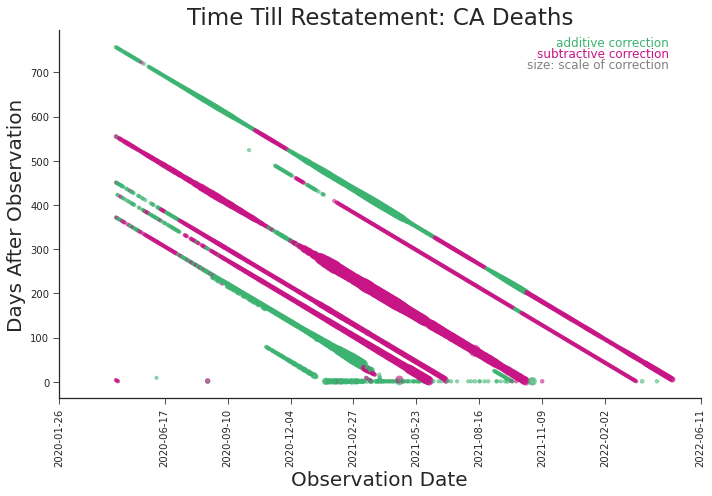

In [44]:
fig, ax, dct = vs.plot_restatement_lags(df ,data_title, show=True)

In [45]:
fig.savefig(f'{path}lags.png', bbox_inches = "tight")

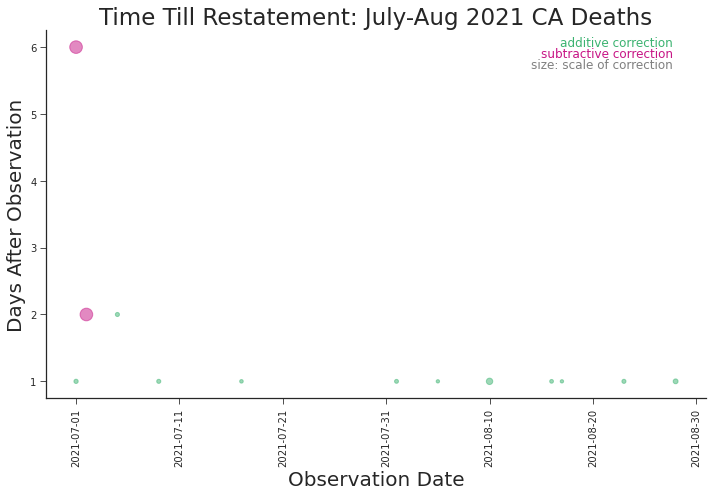

Text(0.5, 0.5, 'No indication\nof Non-Retroactive Change')

In [46]:
fig, ax, dct = vs.plot_restatement_lags(isummer2021_df ,data_title=isummer2021_title, show=True)
ax.text(.5 , .5, f'No indication\nof Non-Retroactive Change', color='grey', fontsize=20, transform=ax.transAxes, ha='center')

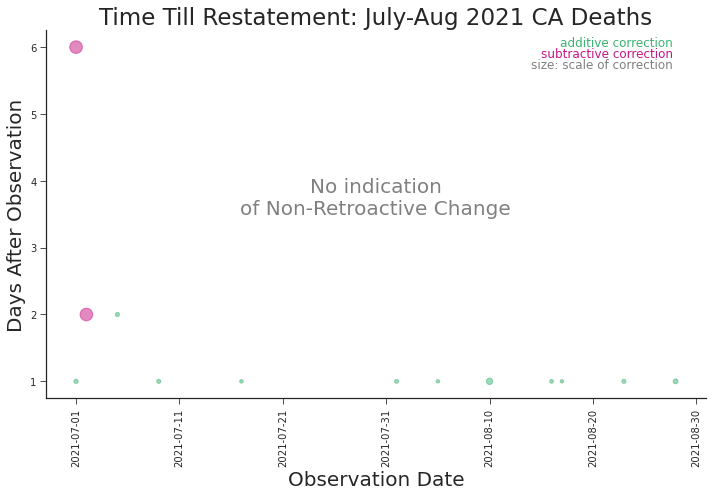

In [47]:
fig

In [48]:
fig.savefig(f'{path}isummer2021_lags.png', bbox_inches = "tight")

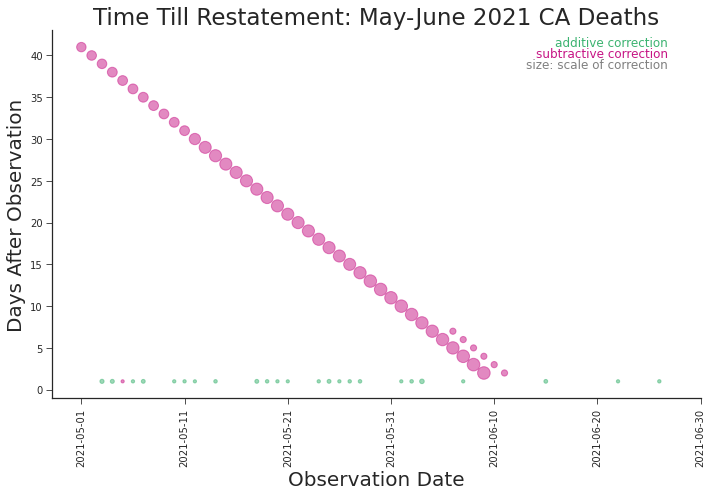

In [49]:
fig, ax, dct = vs.plot_restatement_lags(summer2021_df ,data_title=summer2021_title, show=True)

In [50]:
ax.text(.25 , .4, f'Retroactive Change', color='grey', fontsize=20, transform=ax.transAxes, rotation=-37)
ax.text(.07 , .06,
        f'Indicates Initial Values Were Provisional',
        color='grey', fontsize=13, transform=ax.transAxes)

Text(0.07, 0.06, 'Indicates Initial Values Were Provisional')

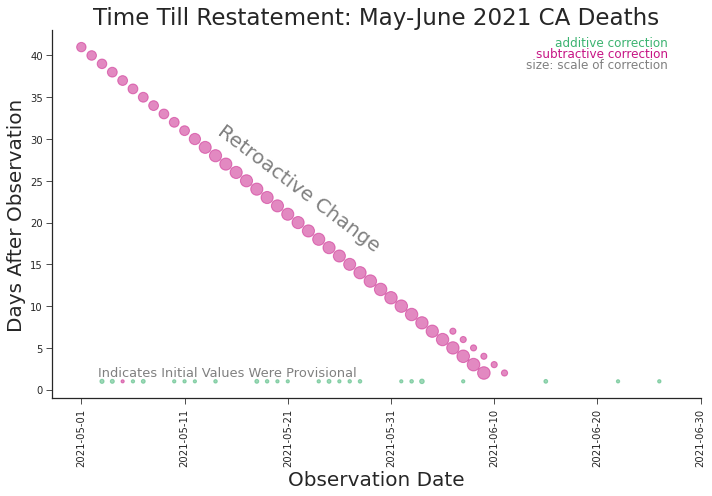

In [51]:
fig

In [52]:
fig.savefig(f'{path}summer2021_lags.png', bbox_inches = "tight")

## Bifrost Plots

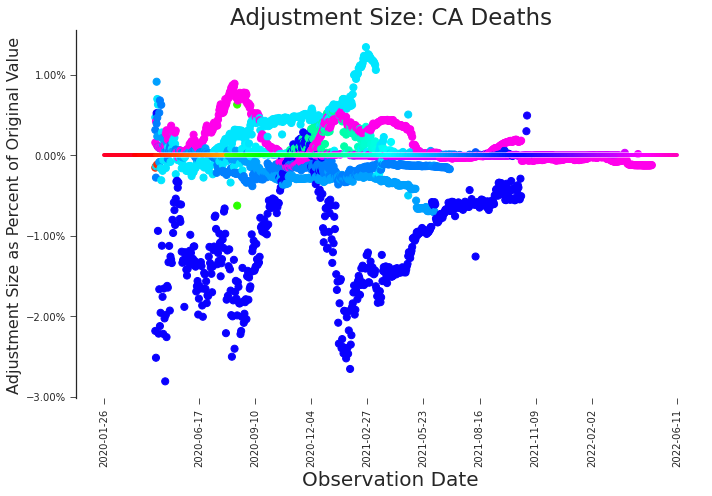

In [53]:
fig, ax, dct = vs.plot_bifrost(df ,data_title, show=True)

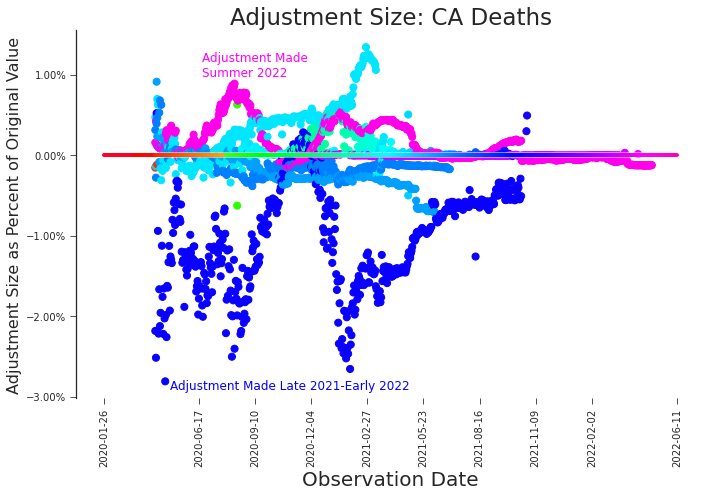

In [54]:
ax.text(.15 , .025, f'Adjustment Made Late 2021-Early 2022', color='blue', fontsize=12, transform=ax.transAxes)
ax.text(.2 , .875, f'Adjustment Made\nSummer 2022', color='magenta', fontsize=12, transform=ax.transAxes)
fig

In [55]:
fig.savefig(f'{path}bifrost.png', bbox_inches = "tight")

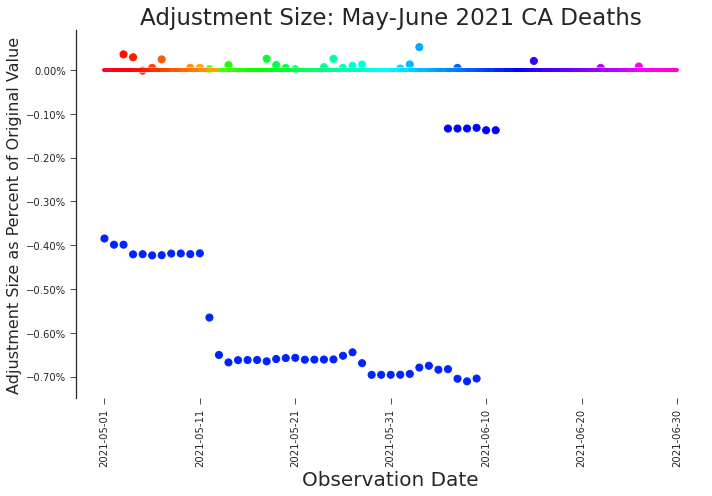

In [56]:
fig, ax, dct = vs.plot_bifrost(summer2021_df ,summer2021_title + "", show=True)


In [57]:
fig.savefig(f'{path}summer2021_bifrost.png', bbox_inches = "tight")


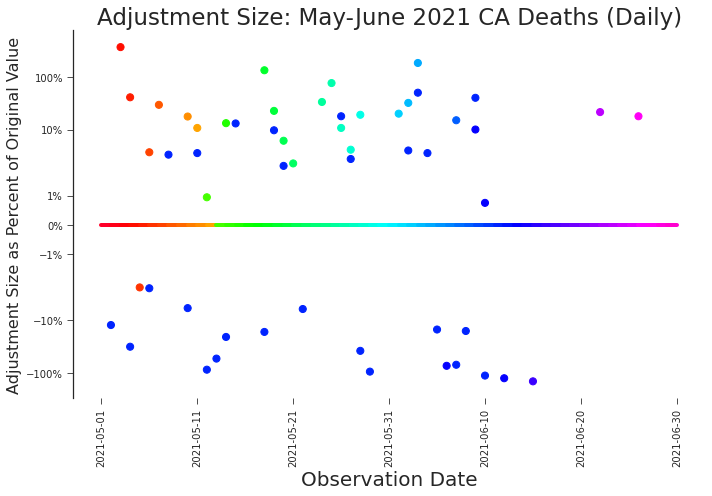

In [58]:
fig, ax, dct = vs.plot_bifrost(summer2021_df.diff() ,summer2021_title + " (Daily)", show=True, y_scale="symlog")

In [59]:
fig.savefig(f'{path}summer2021_bifrost_daily.png', bbox_inches = "tight")

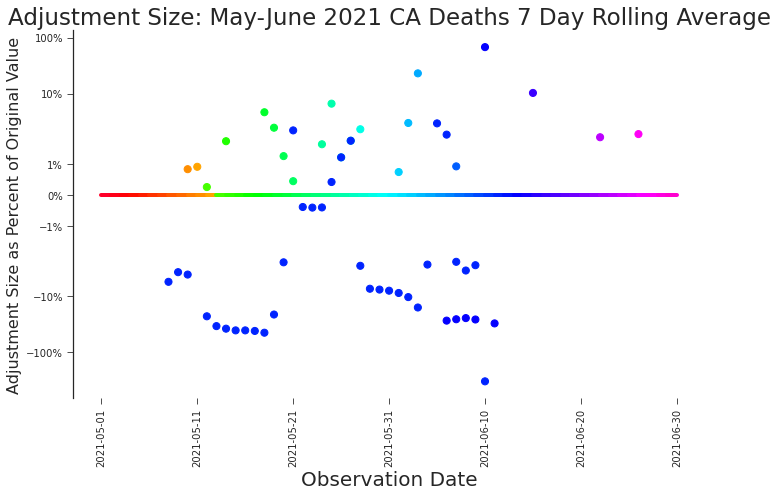

In [60]:
fig, ax, dct = vs.plot_bifrost(summer2021_df.diff().rolling(window=7).mean() ,summer2021_title + " 7 Day Rolling Average", show=True, y_scale="symlog")

In [61]:
fig.savefig(f'{path}summer2021_bifrost_daily_rolling.png', bbox_inches = "tight")

# Impact Plots

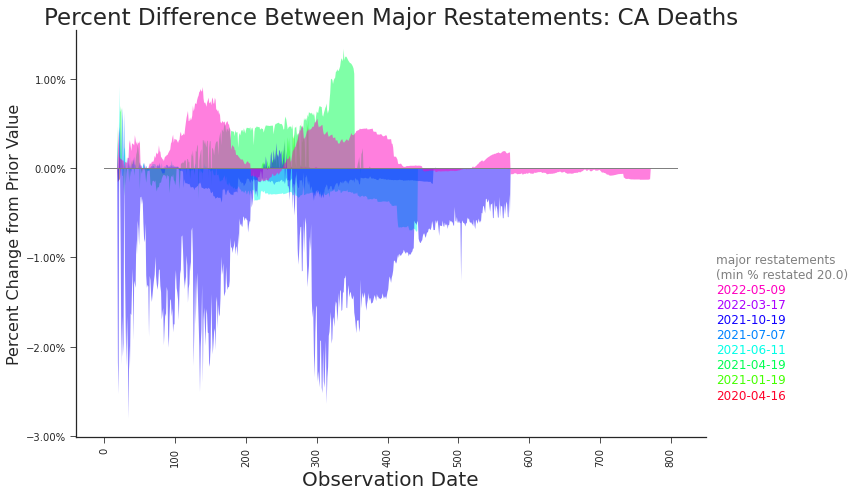

In [62]:
fig, ax, dct = vs.plot_major_restatement_impacts(df, data_title, show=False, percent=True)

In [63]:
fig.savefig(f'{path}impact.png', bbox_inches = "tight")

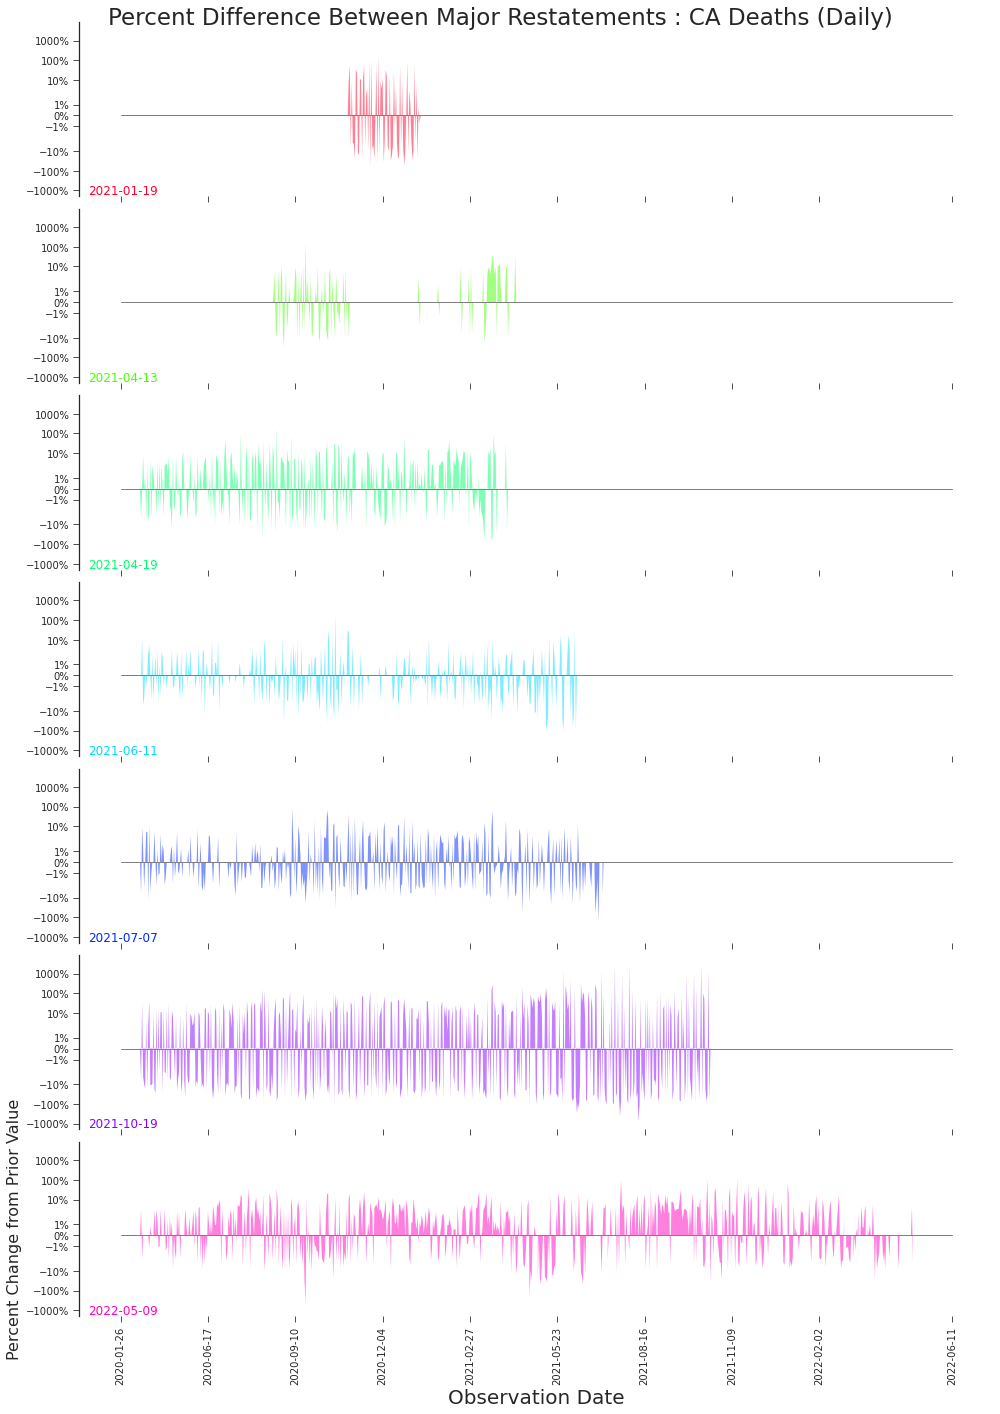

In [64]:
fig, ax, dct = vs.plot_major_restatement_impacts(df.diff(), data_title + " (Daily)", show=False,figsize=(14,20), small_multiples=True, percent=True, y_scale="symlog")

In [65]:
fig.savefig(f'{path}impact_daily.png', bbox_inches = "tight")

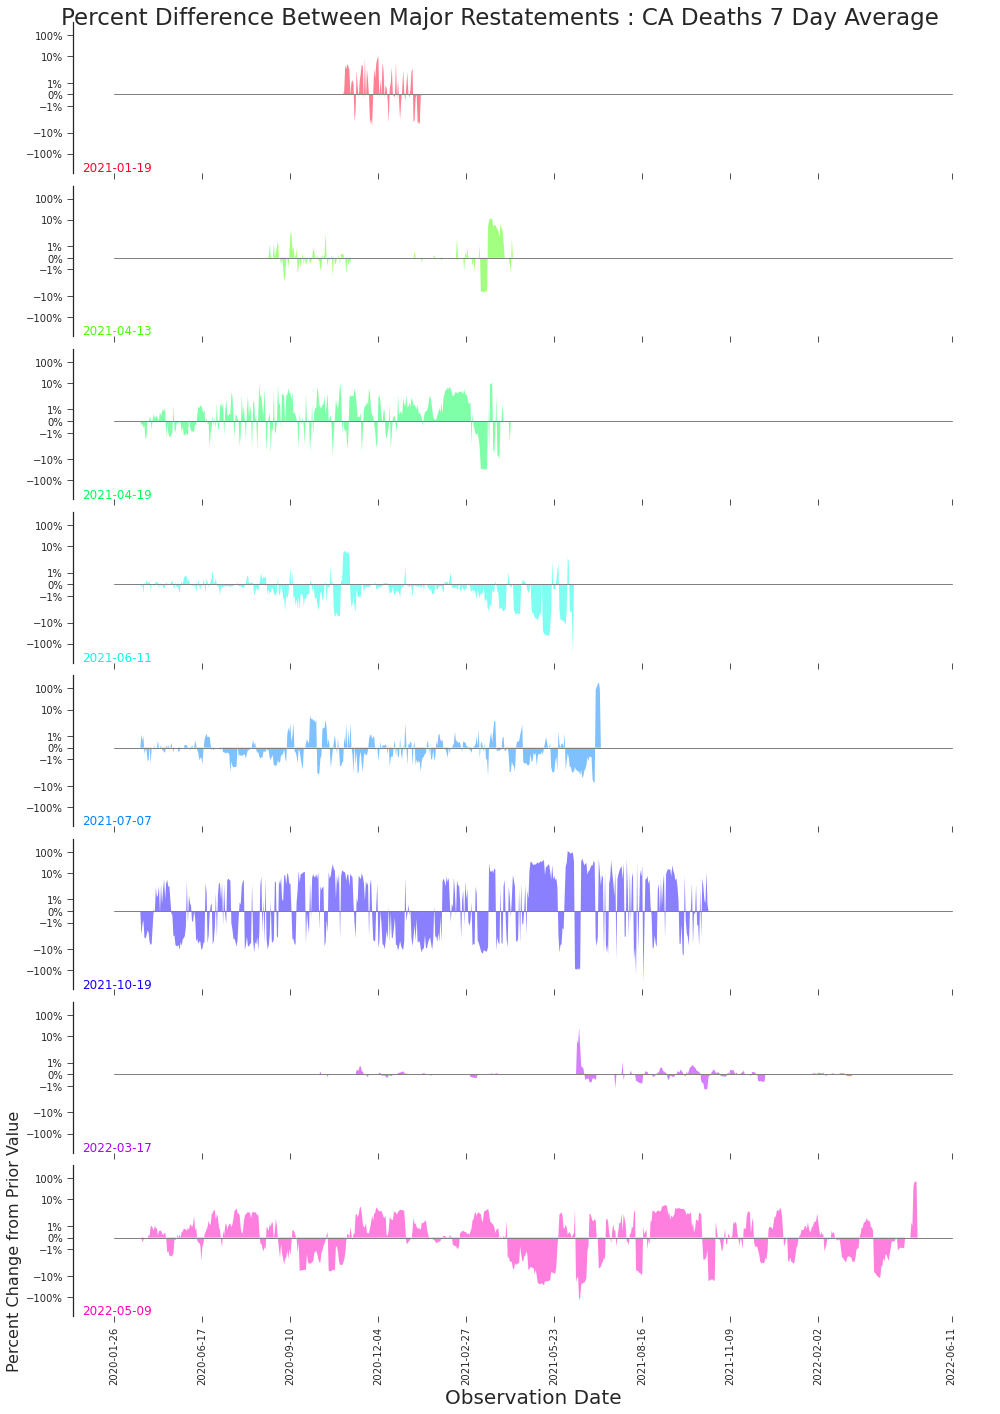

In [66]:
fig, ax, dct = vs.plot_major_restatement_impacts(
    df.diff().rolling(window=7).mean(),
    data_title + " 7 Day Average", show=False,figsize=(14,20), small_multiples=True, percent=True, y_scale="symlog")



In [67]:
fig.savefig(f'{path}impact_daily_rolling.png', bbox_inches = "tight")

## Final Versus Original

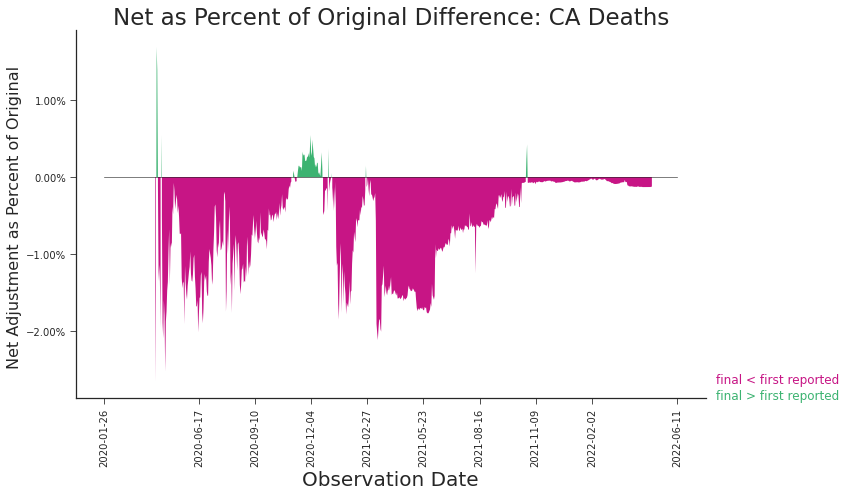

In [68]:
fig, ax, dct = vs.plot_final_to_original(df, data_title, show=False, net=True, percent=True) #, y_scale="symlog")
fig.savefig(f'{path}fvo.png', bbox_inches = "tight")

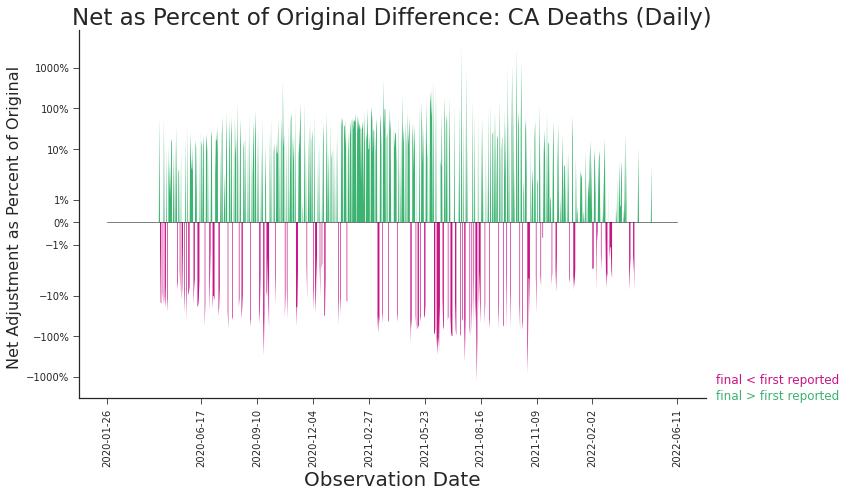

In [69]:
fig, ax, dct = vs.plot_final_to_original(
    df.diff(), data_title + " (Daily)", show=False, net=True, percent=True, y_scale="symlog")
fig.savefig(f'{path}fvo_daily.png', bbox_inches = "tight")

# DO NOT ADD BELOW TO SCRIPT

In [70]:
from jupyckage.jupyckage import notebook_to_package
import shutil

to_latex_folder = "../latex/code/notebooks/"

notebook_name = "VisualizingRestatements_CA_Deaths_JHU"

notebook_to_package(f'{notebook_name}.ipynb')

shutil.copy( f'notebooks/src/{notebook_name}/{notebook_name}.py', f'{to_latex_folder}{notebook_name}.py')

'../latex/code/notebooks/VisualizingRestatements_CA_Deaths_JHU.py'